In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [26]:
data = data.drop(['Revenue'],axis=1)

In [27]:
# 数据预处理  数据数字化LabelEncoder
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'float' or data[col].dtype == 'bool':
        le=LabelEncoder() 
        le.fit(list(data[col].astype(str).values))
        data[col]=le.transform(list(data[col].astype(str).values))
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0,0,0,1,0,1860,4776,0,0,2,1,1,1,1,2,0
1,0,0,0,0,2,7676,0,4673,0,0,2,2,2,1,2,2,0
2,0,0,0,0,1,0,1860,4776,0,0,2,4,1,9,3,2,0
3,0,0,0,0,2,3029,1714,4744,0,0,2,3,2,2,4,2,0
4,0,0,0,0,10,7602,1380,4164,0,0,2,3,3,1,4,2,1


In [125]:
#数据标准化 
scaler = StandardScaler()
X=data.iloc[:,:].values
scaler.fit(X)
X_scaled = scaler.transform(X)

In [126]:
pca = PCA(n_components=3)
pca = pca.fit(X_scaled)
X=pca.transform(X_scaled)

In [127]:
pca.explained_variance_ratio_

array([0.17364181, 0.10335413, 0.08189919])

In [128]:
(pca.explained_variance_ratio_).sum()

0.3588951279467315

In [129]:
#使用KMeans进行聚类
km = KMeans(n_clusters=3)
km.fit(X)
predict_y = km.fit_predict(X)
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)      # 合并聚类结果，并插入到原数据中
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print('\n')
print("*************************************以下为聚类结果**********************************************")
print(result)



*************************************以下为聚类结果**********************************************
       Administrative  Administrative_Duration  Informational  \
0                   0                        0              0   
1                   0                        0              0   
2                   0                        0              0   
3                   0                        0              0   
4                   0                        0              0   
...               ...                      ...            ...   
12325               3                      550              0   
12326               0                        0              0   
12327               0                        0              0   
12328               4                     2951              0   
12329               0                        0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                           0               1       

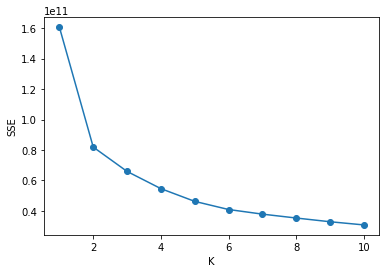

In [132]:
# 手肘法判断簇数的取值,统计不同簇的取值的误差平方和，可以看出n_clusters取2比较合适
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    sse.append(kmeans.inertia_)  # 计算inertia簇内误差平方和
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

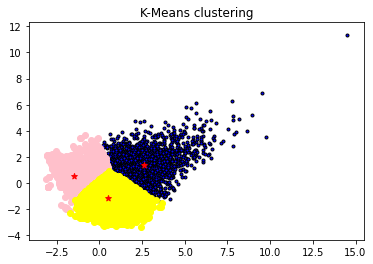

In [133]:
plt.scatter(X[:,0],X[:,1],marker='.',facecolors='b',edgecolors='k')
#质心
centroids = km.cluster_centers_
plt.scatter(X[predict_y == 0,0],X[predict_y == 0,1],c = 'pink')#标签0
plt.scatter(X[predict_y == 1,0],X[predict_y == 1,1],c = 'yellow')#标签1
plt.scatter(centroids[:,0],centroids[:,1],marker='*',color='red')#质心
plt.title('K-Means clustering')#标题
x_min,x_max = min(X[:,0])-1,max(X[:,0])+1
y_min,y_max = min(X[:,1])-1,max(X[:,1])+1
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()